In [14]:
import os
import csv
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
year_list = []
industry_list = []
quarter_list = []
industry_type_list = []
month1_list = []
month2_list = []
month3_list = []
total_wages_list = []

for each_csv_file in glob.glob("*.csv"):
    print(each_csv_file)
    
    csvpath = each_csv_file
    
    with open(csvpath, newline='') as csvfile:
        csvreader = csv.reader(csvfile, delimiter=',')
        for row in csvreader:
            
            if row[0] == "06075":
                year_list.append(row[5])
                industry_list.append(row[10])
                industry_type_list.append(row[9])
                quarter_list.append(row[6])
                month1_list.append(row[14])
                month2_list.append(row[15])
                month3_list.append(row[16])
                total_wages_list.append(row[17])
                
    csvfile.close()
print("Completed data collection")

collected_data_dict = {"Year": year_list, "Industry": industry_list, "Industry Type": industry_type_list,
                      "Quarter": quarter_list, "Emp Level Month #1": month1_list, "Emp Level Month #2": month2_list, "Emp Level Month #3": month3_list,
                      "Total Wages Collected": total_wages_list}
        
collected_data_df = pd.DataFrame(collected_data_dict)

2004.q1-q4 11 Agriculture, forestry, fishing and hunting.csv
2004.q1-q4 21 Mining, quarrying, and oil and gas extraction.csv
2004.q1-q4 22 Utilities.csv
2004.q1-q4 23 Construction.csv
2004.q1-q4 31-33 Manufacturing.csv
2004.q1-q4 42 Wholesale trade.csv
2004.q1-q4 48-49 Transportation and warehousing.csv
2004.q1-q4 51 Information.csv
2004.q1-q4 52 Finance and insurance.csv
2004.q1-q4 53 Real estate and rental and leasing.csv
2004.q1-q4 54 Professional and technical services.csv
2004.q1-q4 55 Management of companies and enterprises.csv
2004.q1-q4 56 Administrative and waste services.csv
2004.q1-q4 61 Educational services.csv
2004.q1-q4 62 Health care and social assistance.csv
2004.q1-q4 71 Arts, entertainment, and recreation.csv
2004.q1-q4 81 Other services, except public administration.csv
2004.q1-q4 92 Public administration.csv
2005.q1-q4 11 Agriculture, forestry, fishing and hunting.csv
2005.q1-q4 21 Mining, quarrying, and oil and gas extraction.csv
2005.q1-q4 22 Utilities.csv
2005.q1

2013.q1-q4 71 Arts, entertainment, and recreation.csv
2013.q1-q4 81 Other services, except public administration.csv
2013.q1-q4 92 Public administration.csv
2014.q1-q4 11 Agriculture, forestry, fishing and hunting.csv
2014.q1-q4 21 Mining, quarrying, and oil and gas extraction.csv
2014.q1-q4 22 Utilities.csv
2014.q1-q4 23 Construction.csv
2014.q1-q4 31-33 Manufacturing.csv
2014.q1-q4 42 Wholesale trade.csv
2014.q1-q4 48-49 Transportation and warehousing.csv
2014.q1-q4 51 Information.csv
2014.q1-q4 52 Finance and insurance.csv
2014.q1-q4 53 Real estate and rental and leasing.csv
2014.q1-q4 54 Professional and technical services.csv
2014.q1-q4 55 Management of companies and enterprises.csv
2014.q1-q4 56 Administrative and waste services.csv
2014.q1-q4 61 Educational services.csv
2014.q1-q4 62 Health care and social assistance.csv
2014.q1-q4 71 Arts, entertainment, and recreation.csv
2014.q1-q4 81 Other services, except public administration.csv
2014.q1-q4 92 Public administration.csv
201

In [16]:
collected_data_df = collected_data_df[['Year', 'Industry', 'Industry Type', 'Quarter', 'Emp Level Month #1',
                                      'Emp Level Month #2', 'Emp Level Month #3', 'Total Wages Collected']]
collected_data_df = collected_data_df.sort_values(['Year', 'Industry']).reset_index(drop=True)

#Dropping government related jobs
collected_data_df_mod = collected_data_df.loc[collected_data_df['Industry Type']=='Private'].reset_index(drop=True)

In [17]:
collected_data_df_mod['Emp Level Month #1'] = pd.to_numeric(collected_data_df_mod['Emp Level Month #1'])
collected_data_df_mod['Emp Level Month #2'] = pd.to_numeric(collected_data_df_mod['Emp Level Month #2'])
collected_data_df_mod['Emp Level Month #3'] = pd.to_numeric(collected_data_df_mod['Emp Level Month #3'])
collected_data_df_mod['Total Wages Collected'] = pd.to_numeric(collected_data_df_mod['Total Wages Collected'])

In [18]:
# Grouping the year and inudstry, then calculating the mean between the ROWS.  Which will then be used in the 
# function to calculate the mean between columns

group_year = collected_data_df_mod.groupby(["Year", "Industry"]).mean()
group_year.head()

Emp Level Month #1  \
Year Industry                                                         
2004 Administrative and waste services                     28531.00   
     Agriculture, forestry, fishing and hunting              175.50   
     Arts, entertainment, and recreation                   10840.00   
     Construction                                          17139.75   
     Educational services                                  12677.00   

                                                 Emp Level Month #2  \
Year Industry                                                         
2004 Administrative and waste services                     28759.25   
     Agriculture, forestry, fishing and hunting              176.50   
     Arts, entertainment, and recreation                   11107.75   
     Construction                                          16827.25   
     Educational services                                  12837.00   

                                                 Emp Level Month #3  \
Year Industry                                                         
2004 Administrative and waste services                     28958.25   
     Agriculture, forestry, fishing and hunting              185.50   
     Arts, entertainment, and recreation                   11004.50   
     Construction                                          16722.75   
     Educational services                                  12978.25   

                                                 Total Wages Collected  
Year Industry                                                           
2004 Administrative and waste services                    3.164701e+08  
     Agriculture, forestry, fishing and hunting           1.451245e+06  
     Arts, entertainment, and recreation                  1.051956e+08  
     Construction                                         2.416840e+08  
     Educational services                                 1.280867e+08

In [19]:
# Yearly employment level - Calculating the mean between columns, then creating a new column with 
# average employment levels for the year.

group_year["Yearly Average Emp"] = (group_year['Emp Level Month #1']+group_year['Emp Level Month #2']+group_year['Emp Level Month #3'])/3

In [20]:
# Sum all both industries - Food/Retail

blah = group_year.groupby("Year").sum()
blah.head()

,Emp Level Month #1,Emp Level Month #2,Emp Level Month #3,Total Wages Collected,Yearly Average Emp
Year,,,,,
2004,311380.50,312493.25,312989.00,5.683295e+09,312287.583333
2005,314516.50,317125.25,318030.50,6.246242e+09,316557.416667
2006,323908.00,326468.00,328471.75,6.854963e+09,326282.583333
2007,341496.25,343960.50,345425.50,7.695329e+09,343627.416667
2008,351253.25,351066.50,350913.25,7.887030e+09,351077.666667


In [21]:
# Rename columns

blah = blah.rename(columns={"Yearly Average Emp": "Yearly Total Emp"})
blah = blah[["Total Wages Collected", "Yearly Total Emp"]]
blah

,Total Wages Collected,Yearly Total Emp
Year,,
2004,5.683295e+09,312287.583333
2005,6.246242e+09,316557.416667
2006,6.854963e+09,326282.583333
2007,7.695329e+09,343627.416667
2008,7.887030e+09,351077.666667
2009,7.217196e+09,335275.000000
2010,7.455209e+09,331663.500000
2011,8.185872e+09,341888.333333
2012,9.036817e+09,365717.583333


In [22]:
output = os.path.join('Total_Wages_Emp_SF_allOther.csv')
blah.to_csv(output, header=True)

In [23]:
# Calculate percentage change year-over-year, using pct_change method

percentage_change = blah.pct_change()
percentage_change_df = percentage_change[["Total Wages Collected", "Yearly Total Emp"]]
percentage_change_df

,Total Wages Collected,Yearly Total Emp
Year,,
2004,NaN,NaN
2005,0.099053,0.013673
2006,0.097454,0.030722
2007,0.122592,0.053159
2008,0.024911,0.021681
2009,-0.084928,-0.045012
2010,0.032979,-0.010772
2011,0.098007,0.030829
2012,0.103953,0.069699


In [24]:
percentage_change_df = percentage_change_df.rename(columns={"Total Wages Collected": "Percentage Change (Wages)",
                                                           "Yearly Total Emp": "Percentage Change (Emp. Level)"})

In [25]:
percentage_change_df = percentage_change_df.reset_index()
percentage_change_df

,Year,Percentage Change (Wages),Percentage Change (Emp. Level)
0,2004,NaN,NaN
1,2005,0.099053,0.013673
2,2006,0.097454,0.030722
3,2007,0.122592,0.053159
4,2008,0.024911,0.021681
5,2009,-0.084928,-0.045012
6,2010,0.032979,-0.010772
7,2011,0.098007,0.030829
8,2012,0.103953,0.069699
9,2013,0.081461,0.057463


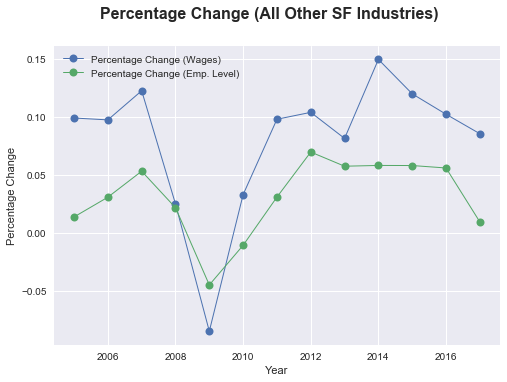

In [26]:
fig, ax1 = plt.subplots(1, sharex=True, sharey= True)
fig.suptitle("Percentage Change (All Other SF Industries)", fontsize=16,
             fontweight="bold")

#ax1.set_xlim(min(year), max(year))
ax1.plot(percentage_change_df['Year'], percentage_change_df['Percentage Change (Wages)'], linewidth=1, marker="o", markersize=8)
ax1.plot(percentage_change_df['Year'], percentage_change_df['Percentage Change (Emp. Level)'], linewidth=1, marker="o", markersize=8)
ax1.set_ylabel("Percentage Change")
ax1.set_xlabel("Year")
plt.legend()
plt.savefig("Percent_changes_SF_allOther.png")
plt.show()